In [57]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Management Data

In [58]:
data= pd.read_csv('./Dataset/Housing.csv')
df=pd.DataFrame(data)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [60]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [61]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [62]:
# Mengubah kolom 'yes'/'no' menjadi 1/0
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

In [63]:
# Menggunakan one-hot encoding untuk kolom 'furnishingstatus'
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

In [64]:
# Memastikan kolom hasil one-hot encoding berisi nilai 0 atau 1
data['furnishingstatus_semi-furnished'] = data['furnishingstatus_semi-furnished'].astype(int)
data['furnishingstatus_unfurnished'] = data['furnishingstatus_unfurnished'].astype(int)

In [65]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


Linear Regression

In [66]:
# Memisahkan fitur dan label
X = data.drop('price', axis=1)
y = data['price']

In [67]:
# Membagi data menjadi set pelatihan dan pengujian (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1754318687330.6628
R-squared (R2): 0.6529242642153186


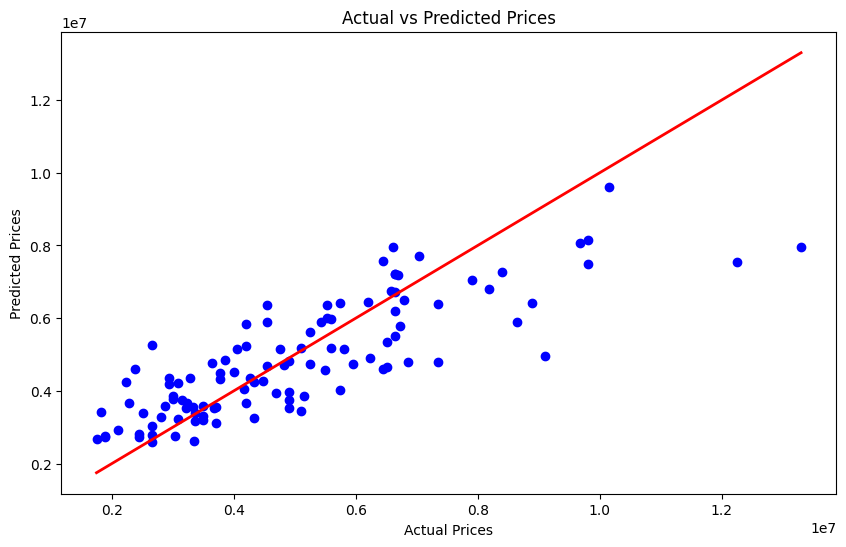

In [69]:
# Membuat plot untuk melihat perbandingan antara nilai sebenarnya dan prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [70]:
# Meminta input dari pengguna untuk prediksi harga rumah
print("Masukkan nilai untuk fitur berikut:")
area = float(input("area: "))
bedrooms = float(input("bedrooms: "))
bathrooms = float(input("bathrooms: "))
stories = float(input("stories: "))
mainroad = int(input("mainroad (1 untuk yes, 0 untuk no): "))
guestroom = int(input("guestroom (1 untuk yes, 0 untuk no): "))
basement = int(input("basement (1 untuk yes, 0 untuk no): "))
hotwaterheating = int(input("hotwaterheating (1 untuk yes, 0 untuk no): "))
airconditioning = int(input("airconditioning (1 untuk yes, 0 untuk no): "))
parking = float(input("parking: "))
prefarea = int(input("prefarea (1 untuk yes, 0 untuk no): "))
furnishingstatus_semi_furnished = int(input("furnishingstatus_semi-furnished (1 untuk yes, 0 untuk no): "))
furnishingstatus_unfurnished = int(input("furnishingstatus_unfurnished (1 untuk yes, 0 untuk no): "))

# Membentuk input ke dalam bentuk 2D array
input_features = np.array([[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus_semi_furnished, furnishingstatus_unfurnished]])

# Membuat prediksi berdasarkan input pengguna
user_prediction = model.predict(input_features)
print(f"Prediksi harga rumah untuk input fitur yang diberikan adalah: ${user_prediction[0]:,.2f}")

Masukkan nilai untuk fitur berikut:


ValueError: could not convert string to float: ''